In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Part 1 - Propress Data

# Step 1. Read data file

In [2]:
#load the myopia dataset
file_path = Path("Resources/myopia.csv")
df = pd.read_csv(file_path)
df.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0


In [3]:
#print column types
df.dtypes

AGE            int64
SPHEQ        float64
AL           float64
ACD          float64
LT           float64
VCD          float64
SPORTHR        int64
READHR         int64
COMPHR         int64
STUDYHR        int64
TVHR           int64
DIOPTERHR      int64
MOMMY          int64
DADMY          int64
MYOPIC         int64
dtype: object

In [4]:
# remove the column "MYOPIC" and "AGE"
df_new = df.drop(columns=["MYOPIC"])
df_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [5]:
# Find null values
for column in df_new.columns:
    print(f"Column {column} has {df_new[column].isnull().sum()} null values")

Column AGE has 0 null values
Column SPHEQ has 0 null values
Column AL has 0 null values
Column ACD has 0 null values
Column LT has 0 null values
Column VCD has 0 null values
Column SPORTHR has 0 null values
Column READHR has 0 null values
Column COMPHR has 0 null values
Column STUDYHR has 0 null values
Column TVHR has 0 null values
Column DIOPTERHR has 0 null values
Column MOMMY has 0 null values
Column DADMY has 0 null values


In [6]:
# Find duplicate entries
print(f"Duplicate entries: {df_new.duplicated().sum()}")

Duplicate entries: 0


# Step 2. Transform data and scale Data 

In [7]:
# Transform Channel
def changeage(age):
    if changeage == 5:
        return 1
    else:
        return 0

# Along with replace() and map(), this is another way to encode the gender column into numbers.
df_new["AGE"] = df_new["AGE"].apply(changeage)
df_new.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,0,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,0,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,0,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,0,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,0,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [8]:
df_new.columns

Index(['AGE', 'SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY'],
      dtype='object')

In [9]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_new[['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
                                           'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY']])

In [10]:
# Create a DataFrame with the transformed data
f_df_new = pd.DataFrame(scaled_data, columns=df_new.columns[1:])
f_df_new['AGE'] = df_new['AGE']
f_df_new.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE
0,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,0
1,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,0
2,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,0
3,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,0
4,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,0


In [11]:
# Saving cleaned data
file_path = Path("Resources/v4/myopia_cleaned_final.csv")
f_df_new.to_csv(file_path, index=False)

# Part 2 Apply Dimensionality Reduction

In [12]:
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.datasets import load_wine

In [13]:
# Loading the preprocessed dataset
file_path = Path("Resources/v4/myopia_cleaned_final.csv")
f_df_new = pd.read_csv(file_path)
f_df_new.head()

,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,AGE
0,-1.363917,-0.892861,0.483784,-0.281443,-1.019792,4.150661,1.697450,-0.689311,-0.672996,0.184058,0.498304,0.987138,1.003241,0
1,-0.308612,-0.171840,0.535910,-0.967997,-0.130763,-0.998898,-0.912062,-0.361875,-0.221409,-0.340932,-0.875088,0.987138,1.003241,0
2,0.604386,-0.009977,-0.506628,-0.177812,0.215809,0.257092,-0.912062,-0.034439,-0.672996,0.184058,-0.750234,-1.013030,-0.996769,0
3,-0.441325,-0.436703,1.230936,0.456927,-0.974587,0.759488,2.676017,-0.689311,-0.672996,-0.865922,0.685585,-1.013030,1.003241,0
4,-0.166306,1.167204,0.422970,-0.566427,1.180178,0.257092,-0.912062,-0.689311,-0.672996,-0.865922,-1.374503,0.987138,-0.996769,0


In [14]:
f_df_new.columns

Index(['SPHEQ', 'AL', 'ACD', 'LT', 'VCD', 'SPORTHR', 'READHR', 'COMPHR',
       'STUDYHR', 'TVHR', 'DIOPTERHR', 'MOMMY', 'DADMY', 'AGE'],
      dtype='object')

In [38]:
# Applying PCA to reduce dimensions from 14 to 10

# Initialize PCA model
pca = PCA(n_components=.90)

# Get ten principal components for the data.
dfnewp_pca = pca.fit_transform(f_df_new)

#how did the number of features change?
dfnewp_pca.shape

(618, 10)

In [39]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.21354572, 0.16787948, 0.09105857, 0.08640248, 0.08082413,
       0.07518118, 0.06960408, 0.05817893, 0.0560604 , 0.05526345])

In [40]:
0.21354572+0.16787948+0.09105857+0.08640248+0.08082413+0.07518118+0.06960408+0.05817893+0.0560604+0.05526345

0.9539984199999999

In [65]:
# Run t-SNE to further reduce dimension
tsne = TSNE(learning_rate=950)
tsne_features = tsne.fit_transform(dfnewp_pca)

In [66]:
# Check that dimensions have been reduced to two
tsne_features.shape

(618, 2)

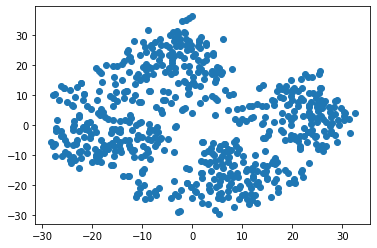

In [67]:
# Plot the results
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

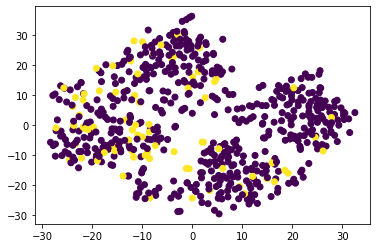

In [68]:
# Results colored by target value
labels = df['MYOPIC']
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()

In [69]:
#Are there distinct clusters?
#Kind of. 

# Part 3 Perform a Cluster Analysis with K-means

In [70]:
# Transform reduced dimention data to a DataFrame
df_pca_tsne = pd.DataFrame(
    data=tsne_features, columns=["principal component 1", "principal component 2"]
)
df_pca_tsne.head()

,principal component 1,principal component 2
0,-10.617058,7.630249
1,-16.652376,-6.630359
2,20.265858,2.681791
3,-1.212501,-14.441734
4,3.968954,17.082075


C:\Users\yings\anaconda3\envs\PythonData38\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


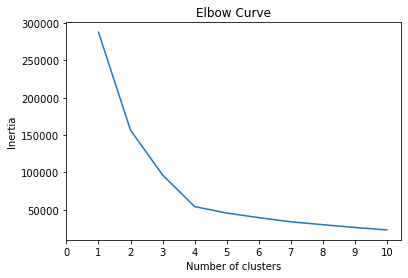

In [71]:
# Finding the best value for k
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_pca_tsne)
    inertia.append(km.inertia_)

# Creating the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(list(range(11)))
plt.title('Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [ ]:
# Findings & Recommendations
# Based on the combined analysis results from Elbow Curve analysis and the plot image generated from PCA and tSNE data model, 
# it shows patient can be clustered to 4 as the best number.